In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'times.txt'
json = pd.read_csv(filename)

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = json
df.groupby('program')


In [5]:
df[["totaltime", "seconds"]] = df["totaltime"].str.split(":", 1, expand=True)
df[["seconds", "mSeconds"]] = df["seconds"].str.split(".", 1, expand=True)
df["totaltime"] = df["totaltime"].astype(int) * 60 + df["seconds"].astype(int)



In [6]:
df["program"] = df["program"].str.strip("  ")

In [7]:
df[["program", "timeSteps"]] = df["program"].str.split(" ", 1, expand=True)
df[["timeSteps", "xSize"]] = df["timeSteps"].str.split(" ", 1, expand=True)
df[["xSize", "ySize"]] = df["xSize"].str.split(" ", 1, expand=True)
df[["ySize", "xCores"]] = df["ySize"].str.split(" ", 1, expand=True)
df[["xCores", "yCores"]] = df["xCores"].str.split(" ", 1, expand=True)


In [8]:
df['amountCores'] = df['xCores'].astype(int) * df['yCores'].astype(int)

In [9]:

df['program'] = df['program'] + df['timeSteps'] + df['amountCores'].astype(str)
df['timeSteps'] = df["timeSteps"].astype(int)
df['cpu'] = df['cpu'].str.strip("%").astype(int) / df['amountCores'].astype(int)

In [10]:
df2 = df.groupby('program').mean()

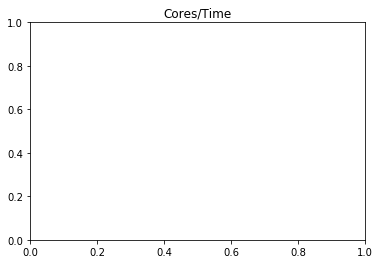

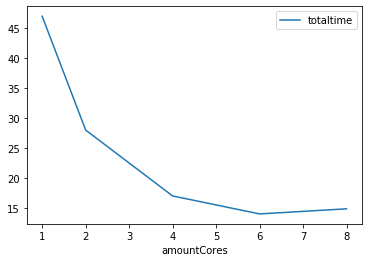

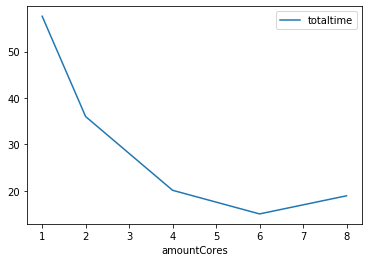

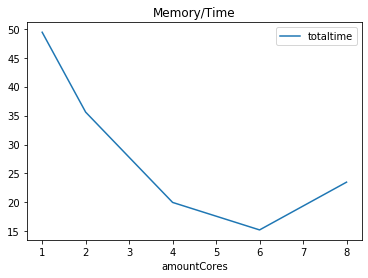

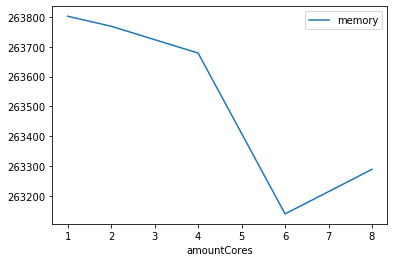

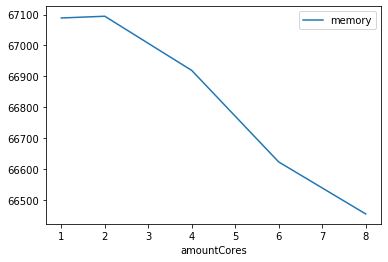

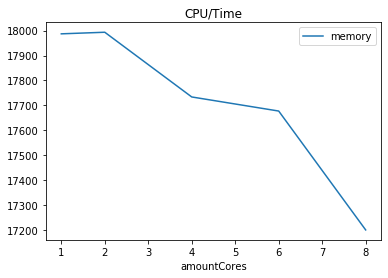

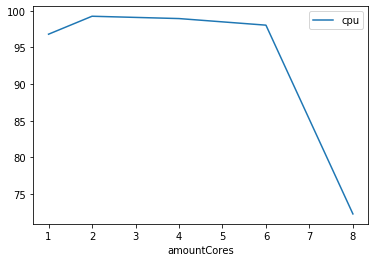

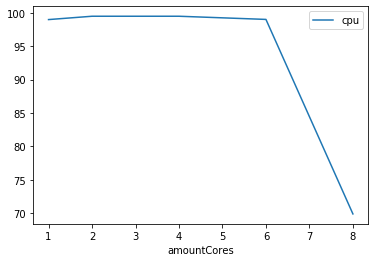

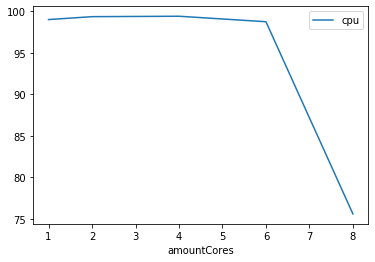

In [11]:
plt.title("Cores/Time")
df2.groupby("timeSteps").plot( x = "amountCores", y="totaltime")
plt.title("Memory/Time")
df2.groupby("timeSteps").plot( x = "amountCores", y="memory")
plt.title("CPU/Time")
df2.groupby("timeSteps").plot( x = "amountCores", y="cpu")

plt.show()